In [1]:
predicted_values

NameError: name 'predicted_values' is not defined

In [ ]:
data.index[-1]

Timestamp('2022-01-06 00:00:00')

In [ ]:
pd.DateOffset(days=1) 

<DateOffset: days=1>

In [ ]:
pd.DateOffset(months=n_months)

<DateOffset: months=3>

In [ ]:
data.index[-1] + pd.DateOffset(days=1) + pd.DateOffset(months=n_months)

Timestamp('2022-04-07 00:00:00')

In [ ]:
next_indices

array([[230],
       [231],
       [232]])

In [ ]:
y

Data
2022-12-06    110.189
2022-12-05    109.401
2022-12-02    111.924
2022-12-01    110.926
2022-11-30    112.486
               ...   
2022-01-12    105.686
2022-01-11    103.779
2022-01-10    101.945
2022-01-07    102.719
2022-01-06    101.561
Name: Último, Length: 230, dtype: float64

In [ ]:
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

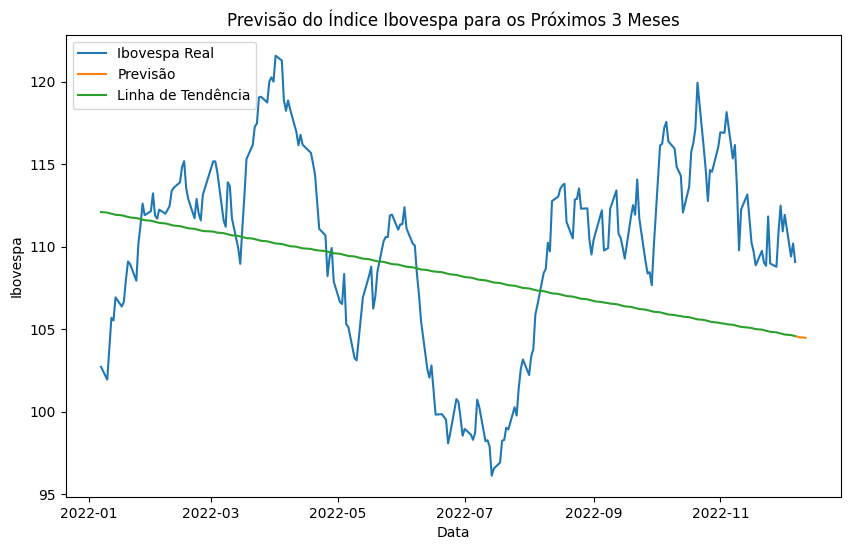

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load historical data for the Ibovespa index (replace with your dataset)
# Suppose you have a CSV file with columns 'Data' and 'Último' (Last)

path = '../data/Dados Históricos - Ibovespa.csv'
data = pd.read_csv(path)
data['Data'] = pd.to_datetime(data['Data'], format='%d.%m.%Y')
data.set_index('Data', inplace=True)

#Order data by date
data.sort_index(inplace=True)

# Calculate daily returns
data['Retorno'] = data['Último'].pct_change()

# Prepare data for the model
data.dropna(inplace=True)
X = np.array(range(len(data))).reshape(-1, 1)
y = data['Último']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the Ibovespa index for the next 3 months
n_months = 3
next_indices = np.array(range(len(data), len(data) + n_months)).reshape(-1, 1)
predicted_values = model.predict(next_indices)

# Generate dates for the predicted values
last_date = data.index[-1]
predicted_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=n_months, freq='B')

# Plot results and tendence line
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Último'], label='Ibovespa Real')
plt.plot(predicted_dates, predicted_values, label='Previsão')
plt.plot(data.index, model.predict(X), label='Linha de Tendência')
plt.xlabel('Data')
plt.ylabel('Ibovespa')
plt.legend()
plt.title('Previsão do Índice Ibovespa para os Próximos 3 Meses')
plt.show()


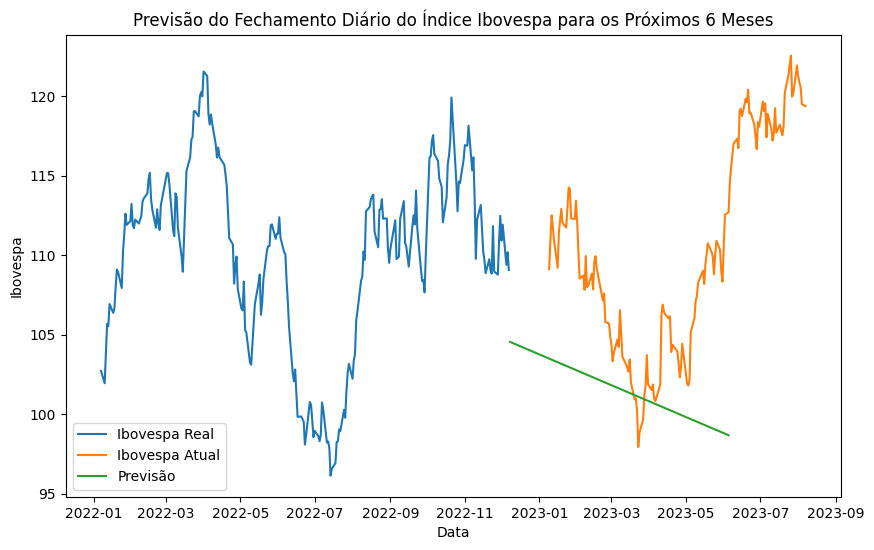

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar dados históricos do índice Ibovespa (substitua pelo seu conjunto de dados)
# Vamos supor que você tem um arquivo CSV com colunas 'Data' e 'Ibovespa'
path = '../data/Dados Históricos - Ibovespa.csv'
data = pd.read_csv(path)
data['Data'] = pd.to_datetime(data['Data'], format='%d.%m.%Y')
data.set_index('Data', inplace=True)

#Order data by date
data.sort_index(inplace=True)

# Calcular os retornos diários
data['Retorno'] = data['Último'].pct_change()

# Preparar os dados para o modelo
data.dropna(inplace=True)
X = np.array(range(len(data))).reshape(-1, 1)
y = data['Último']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prever o fechamento diário do índice Ibovespa para os próximos 6 meses
n_days = 6 * 30  # 6 meses com média de 30 dias por mês
next_indices = np.array(range(len(data), len(data) + n_days)).reshape(-1, 1)
predicted_values = model.predict(next_indices)

# Criar um índice de datas para as previsões
date_range = pd.date_range(start=data.index[-1] + pd.DateOffset(days=1), periods=n_days, freq='D')

# Criar um DataFrame com as previsões
predictions_df = pd.DataFrame({'Data': date_range, 'Previsao_Ibovespa': predicted_values})
predictions_df.set_index('Data', inplace=True)

#Dados 2023
path = '../data/Dados Históricos 2023 - Ibovespa.csv'
data_recent = pd.read_csv(path)
data_recent['Data'] = pd.to_datetime(data_recent['Data'], format='%d.%m.%Y')
data_recent.set_index('Data', inplace=True)

#Order data by date
data_recent.sort_index(inplace=True)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Último'], label='Ibovespa Real')
plt.plot(data_recent.index, data_recent['Último'], label='Ibovespa Atual')
plt.plot(predictions_df.index, predictions_df['Previsao_Ibovespa'], label='Previsão')
plt.xlabel('Data')
plt.ylabel('Ibovespa')
plt.legend()
plt.title('Previsão do Fechamento Diário do Índice Ibovespa para os Próximos 6 Meses')
plt.show()


c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase02\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase02\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase02\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Igor\Documents\GitHub\Tech_Challenge_Fase02\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppor

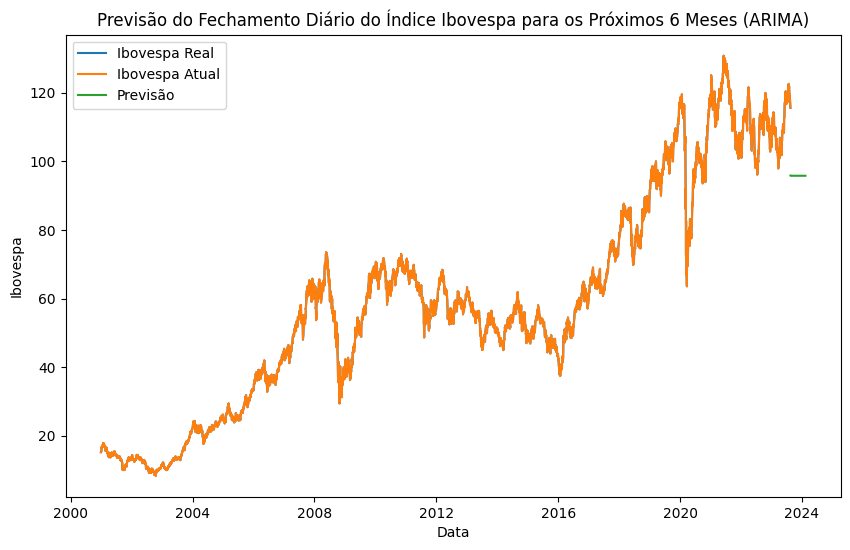

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Carregar dados históricos do índice Ibovespa (substitua pelo seu conjunto de dados)
# Vamos supor que você tem um arquivo CSV com colunas 'Data' e 'Ibovespa'
path = '../data/Dados Históricos 2000-2023 - Ibovespa.csv'
data = pd.read_csv(path)
data['Data'] = pd.to_datetime(data['Data'], format='%Y-%m-%d')
data.set_index('Data', inplace=True)

# Order data by date
data.sort_index(inplace=True)

# Calcular os retornos diários
data['Retorno'] = data['Último'].pct_change()

# Preparar os dados para o modelo
data.dropna(inplace=True)
y = data['Último']

# Dividir os dados em treino e teste
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Treinar o modelo ARIMA
order = (5, 1, 0)  # Parâmetros do ARIMA (p, d, q)
model = ARIMA(train, order=order)
model_fit = model.fit()

# Fazer previsões
n_days = 6 * 30  # 6 meses com média de 30 dias por mês
predictions = model_fit.forecast(steps=n_days)

# Criar um índice de datas para as previsões
date_range = pd.date_range(start=data.index[-1] + pd.DateOffset(days=1), periods=n_days, freq='D')

# Criar um DataFrame com as previsões
predictions_df = pd.DataFrame({'Data': date_range, 'Previsao_Ibovespa': predictions})
predictions_df.set_index('Data', inplace=True)

# Dados 2023
path = '../data/Dados Históricos 2000-2023 - Ibovespa.csv'
data_recent = pd.read_csv(path)
data_recent['Data'] = pd.to_datetime(data_recent['Data'], format='%Y-%m-%d')
data_recent.set_index('Data', inplace=True)

# Order data by date
data_recent.sort_index(inplace=True)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Último'], label='Ibovespa Real')
plt.plot(data_recent.index, data_recent['Último'], label='Ibovespa Atual')
plt.plot(predictions_df.index, predictions_df['Previsao_Ibovespa'], label='Previsão')
plt.xlabel('Data')
plt.ylabel('Ibovespa')
plt.legend()
plt.title('Previsão do Fechamento Diário do Índice Ibovespa para os Próximos 6 Meses (ARIMA)')
plt.show()
